In [1]:
from matplotlib import pyplot as plt 
import numpy as np 
from math import sqrt, cos, sin, pi

# ЧИСЛЕННОЕ ИНТЕГРИРОВАНИЕ

## Вариант 24 
$$ I = \int_{1}^{1.44} P_n(x) dx$$
$$ P_n(x) = \sum_{i=0}^{n} c_i x^i  $$
$$ c = (1.3, 0.5, 2.1, 5.7, 8.3, -3.7)$$

### Аналитическое решение. 

$$ P_n(x) = 1.3 + 0.5x + 2.1x^2 + 5.7x^3+8.3x^4-3.7x^5 $$

$$ F(x) =\int_{}^{} (1.3 + 0.5x + 2.1*x^2 + 5.7x^3+8.3x^4-3.7x^5 ) dx = 1.3x + 0.25x^2 + 0.7x^3 +1.425x^4+1.66x^5 -\frac{3.7}{6}x^6 + const $$
$$ I = ( 1.3x + 0.25x^2 + 0.7x^3 +1.425x^4+1.66x^5 -\frac{3.7}{6}x^6 )\vert_{1}^{1.44}=F(1.44)-F(1) = 15.3878 - 4.71833 = 10.6695$$ 

Получаем 10.6695 - аналитическое решение. Будем считать данное значение истинным решением, которогое пригодится при поиске погрешностей. 

### Численное решение. 

In [2]:
def p_n(x):
    #многочлен Р(х)
    return 1.3 + 0.5*x + 2.1*x*x + 5.7*x*x*x+8.3*x*x*x*x-3.7*x*x*x*x*x

a=1.0
b=1.44

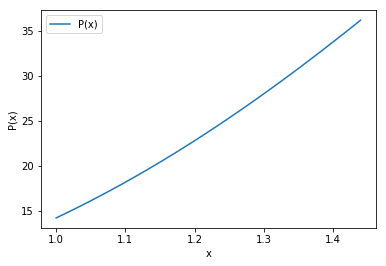

In [3]:
p_plot = np.linspace(1.00, 1.44, 100)
y_plot =np.apply_along_axis(p_n, 0, p_plot)

plt.plot(p_plot, y_plot, label = "P(x)")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.legend()

#### Метод трапеций. 
##### Интегрирование на элементарном отрезке. 
Метод основан на простом применении формулы для площади трапеции — произведение полусуммы оснований, которыми в данном случае являются значения функции в крайних точках отрезка, на высоту (длину отрезка интегрирования).
Если отрезок [ a , b ] является элементарным и не подвергается дальнейшему разбиению, значение интеграла можно найти по формуле:
$$ I = \int_{a}^{b} f(x) dx = \frac{f(a)+f(b)}{2}(b-a) $$

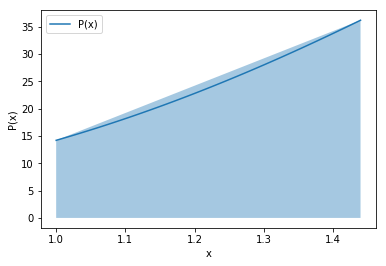

In [4]:
plt.plot(p_plot, y_plot, label = "P(x)")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.legend()
plt.fill_between([a,b],[p_n(a),p_n(b)], alpha = 0.4)

По графику видно кусок, который отразится в погрешности полученных результатов. 

In [5]:
def trapezi_elementary(f, a, b):
    #это прямо формула трапеции 
    return (f(a)+f(b))/2*(b-a)

In [6]:
integral_el_trap = trapezi_elementary(p_n, a, b)
print("Значение интеграла I, когда отрезок [1.0, 1.44] является элементарным: ")
print(integral_el_trap)

Значение интеграла I, когда отрезок [1.0, 1.44] является элементарным: 
11.0822194571264


In [7]:
abs_error_trapezi = abs(10.6695  - integral_el_trap)
print("Величина погрешности: ", abs_error_trapezi)

Величина погрешности:  0.4127194571263999


#### Формула Симпсона.
##### Интегрирование на элементарном отрезке.  
Суть метода заключается в приближении подынтегральной функции на отрезке [ a , b ]  интерполяционным многочленом второй степени $p_2( x )$ , то есть приближение графика функции на отрезке параболой.

Элементарная квадратурная формула: 
$$\int_{a}^{b} f(x) dx = \frac{(b-a)}{6}(f(a)+4f(\frac{a+b}{2}) + f(b)) $$ 

Попробуем ради интереса провести параболу для нашего многочлена по трем точкам: а, b и середине отрезка интегрирования. 

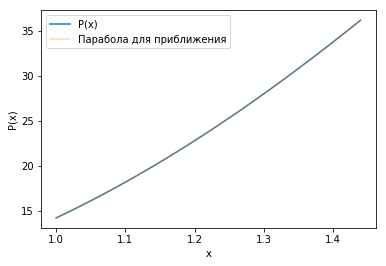

In [8]:
m =0.5*a+0.5*b
fa = p_n(a)
fb = p_n(b)
fm  = p_n(m)
A= [[a*a, a, 1],[m*m, m,1], [b*b,b,1] ]
B = [fa, fm, fb]
coefs = np.linalg.solve(A, B) # нашли коэффициенты параболы. 

def simp_f(x, params=coefs ):
    return params[0]*x*x+params[1]*x+params[2]
    
    
    
simp_plot = np.linspace(1.00, 1.44, 200)

simp_y_plot =np.apply_along_axis(simp_f, 0, simp_plot)

plt.plot(p_plot, y_plot, label = "P(x)")
plt.plot(simp_plot, simp_y_plot, label = "Парабола для приближения", alpha = 0.3)
#plt.fill_between(simp_plot,simp_y_plot, alpha = 0.4)
plt.xlabel("x")
plt.ylabel("P(x)")
plt.legend()
#plt.plot(simp_plot, simp_y_plot, label = "Парабола для приближения")
#plt.fill_between(simp_plot,simp_y_plot, alpha = 0.4)

Должна получиться неплохая точность. 

In [9]:
def simpson_elementary(f, a, b):
    #сама формула симпсона 
    return (b-a)/6*(f(a)+f(b)+4*f((a+b)/2))

In [10]:
integral_el_simp = simpson_elementary(p_n, a, b)
print("Значение интеграла I, когда отрезок [1.0, 1.44] является элементарным: ")
print(integral_el_simp)

Значение интеграла I, когда отрезок [1.0, 1.44] является элементарным: 
10.667554023995732


In [11]:
abs_error_simp = abs(10.6695  - integral_el_simp)
print("Величина погрешности: ", abs_error_simp)

Величина погрешности:  0.001945976004266825


#### Текущие результаты. 
На данном этапе результат, полученный методом трапеций, дает достаточную погрешность. Метод Симпсона позволил получить результат с большей точностью. 

##### Составная Квадратурная формула трапеций 
Если отрезок [ a , b ]  разбивается узлами интегрирования на n равных отрезков длиной h (равномерная сетка) и на каждом из элементарных отрезков применяется формула трапеций, то получается составная квадратурная формула трапеций: 
$$ I = \int_{a}^{b} f(x) dx = (\sum_{i=1}^{n-1} f_i + \frac{f_0+f_n}{2})h $$
Предполагаем, что $f(x)=P_n(x)$ - дважды непрерывно диффиренцируемая функция (так и есть в нашем случае). 
Остаточный член:
$$R =<= \frac{M_2*(b-a)}{12} h^2, $$ где $M_2$ - максимальное значение второй производной f''(x) на отрезке [ a , b ]. 
Метод имеет второй порядок точности относительно h. 
$$ f''(x) = 4.2 + 34.2 x + 99.6 x^2 - 74 x^3 $$


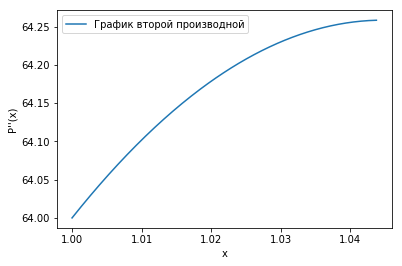

In [12]:
def m_2(x):
    #вторая производная 
    return 4.2 + 34.2*x + 99.6*x**2-74*x**3

mp_plot = np.linspace(1.00, 1.44, 2000)
my_plot =np.apply_along_axis(m_2, 0, mp_plot) # значения второй произодной на отрезке 

plt.plot(mp_plot[:200], my_plot[:200], label = "График второй производной") #левый кусок
plt.xlabel("x")
plt.ylabel("P''(x)")
plt.legend()

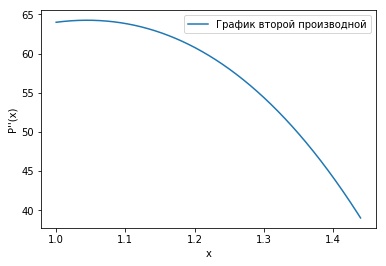

In [13]:
plt.plot(mp_plot, my_plot, label = "График второй производной") # весь отрезок 
plt.xlabel("x") 
plt.ylabel("P''(x)")
plt.legend()

Как видно по графику, функция не ведет себя монотонно на отрезке [1, 1.44] $ \implies $ Максимальное значение  найдем численно. 

In [14]:
print("Максимальное значение производной на отрезке: ", max(my_plot))

Максимальное значение производной на отрезке:  64.25840421581307


##### Выбираем нужный шаг h.
Желаемая точность: 0.0001.
$$ \frac{M_2*(b-a)}{12} h^2 = \frac{M_2*(1.44-1.0)}{12} h^2 < 0.0001$$

In [15]:
h = sqrt(12.0/max(my_plot)/(b-a))*1e-2 # h>0
#это решение неравенства 
print("Подходящее h: ", h)
print("примерное число отрезков: ", (b-a)/h)

Подходящее h:  0.006514773433595207
примерное число отрезков:  67.53880307349138


Будем делить наш отрезок на 68 отрезков для получения желаемой точности. 

In [16]:
new_h = (b-a)/68.0
print("возьмем такое h: ", new_h)

возьмем такое h:  0.006470588235294117


##### Вычислим значение интеграла 

In [17]:
def trapezi_all(f, a, b, n):
    h = float(b-a)/n # тут будет h для 68 отрезков 
    trapezi = f(a)/2.0 +f(b)/2.0 # отдельно обрабатывем значения на концах отрезка
    for i in range(1, n):
        trapezi += f(a + i*h) #все остальное 
    trapezi *= h 
    return trapezi

In [18]:
trapezi_all_I = trapezi_all(p_n, a, b, 68)
print("ПОлученный результат: ", trapezi_all_I)
abs_error_tr_all = abs(10.6695  -     trapezi_all_I)
print("Величина погрешности: ", abs_error_tr_all)

ПОлученный результат:  10.669602709309162
Величина погрешности:  0.00010270930916256304


Метод трапеций позволил найти численно значение интеграла с нужной точностью. 


##### Составная Квадратурная формула Симпсона 
Если отрезок [ a , b ]  разбивается узлами интегрирования на n равных отрезков длиной h  и на каждом из элементарных отрезков применяется формула Симпосона, то получается следующая квадратурная формула: 
$$ I = \frac{h}{6} (f_0+f_n + 4\sum_{i=1}^{n} f_{i-1/2} + 2\sum_{i=1}^{n-1} f_{i}    )$$
Где  $f_{i-1/2} = f(\frac{x_i+x_{i-1}}{2})$

Предполагаем, что у нашей функции есть четвертая производная (так и есть). Остаточный член: 
$$ R = \frac{M_4(b-a)h^4}{2880} $$ 
где $M_4$ - максимальное значение четвертой производной интегрируемой функции. 
$$ P^{(4)}(x) =  199.2 - 444 x $$ 
Это линейная функция, убывающая, принимающая на отрезке интегрирования отрицательные значения $ \implies $ максимальное значение модуля функции будет в конце отрезка - в точке b. 
Для поиска нужного h: 
$$ R = \frac{P^{(4)}(a)(b-a)h^4}{2880} <0.0001 $$ 
Метод имеет четвертый порядок точности относительно h. 

Составная квадратурная формула Симпсона для четного количества разбиаения отрезков (n):
$$ I = \frac{h}{3}\sum_{i=1}^{n/2} ( f(x_{2i-2}) +4f(x_{2i-1})  +f(x_{2i})  )$$
Будем использовать последнюю формулу.

In [19]:
p_4_max = abs(199.2-444*b) #максимальное значение четвертой производной 
h_s = (0.288/p_4_max/(b-a)) **0.25
print("Найденный h :", h_s)
print("Число отрезков для такого h  : ", int((b-a)/h_s)+1)

Найденный h : 0.19637324174824447
Число отрезков для такого h  :  3


Мы будем делить на 4 отрезка, так как 3 - нечетное число. 

In [20]:
def simpson_all(f,a,b, n):
    
    h = float((b-a)/n) # шаг для необходимого числа отрезков 
    x = np.linspace(a,b, n+1)
    pn = np.apply_along_axis(p_n, 0, x)
    simpson= h/3.0 * np.sum(pn[0:-1:2] + 4*pn[1::2] + pn[2::2])  # это сама формула (суммирование)
    # засчет индексации нужные слагаемые учитываются нужное число раз 
    return simpson

In [21]:
simps_all_result = simpson_all(p_n, a, b, 4)
print("ПОлученный результат: ", simps_all_result)
abs_error_tr_all = abs(10.6695  -     simps_all_result)
print("Величина погрешности: ", abs_error_tr_all)

ПОлученный результат:  10.669392582211731
Величина погрешности:  0.00010741778826783843


Метод Симпсона тоже позволил вычислить интеграл численно с нужной точностью. Можно заметить, что для метода Симпсона отрезок интегрирования делился на меньшее число отрезков, чем это было в методе трапеций для получения той же точности. Причина - метод Симпсона обладает четвертым порядком точности относительно постоянного шага интегрирования, а метод трапеций - вторым порядком. 

### Задача 8.3 

$$ I = \int_{a}^{b} f(x) dx$$
$$ f(x) = (x^2-2x^3)cos(x^2), a=-3.0, b=0 $$

### Аналитическое решение 

$$ I = \int_{-3}^{0}  (x^2-2x^3)cos(x^2)dx = 2.02933$$
Тут в примере возникают $ cos(x^2) $ под интеграла -  куски функций Френеля и интегрировать их такое себе. Наконец-то численное решение будет реально полезно!  

### Формула центральных прямоугольников. 
Метод заключается в приближённом вычислении площади под графиком суммированием площадей конечного числа прямоугольников, ширина которых будет определяться расстоянием между соответствующими соседними узлами интегрирования ( в нашем случае все расстояния равны). В случае центральных высота прямоугольника проводится до значения функции в середине отрезка. 

На элементарном отрезке интегрирования для центральных прямоугольников:
$$ I = \int_{a}^{b} f(x) dx = f(\frac{a+b}{2})(b-a) $$

Абсолютная теоретическая погрешность:
$$ R = \frac{M_2(b-a)h^2}{24} $$
Тут $M_2$ - максимальное значение произодной на отрезке интегрирования. 
$$ f''(x) = 2 ((1 - 6 x - 2 x^4 + 4 x^5) cos(x^2) + x^2 (-5 + 14 x) sin(x^2)) $$
Второй порядок точности относительно h.
Будем применять метод, каждый раз поделив отрезок интегрирования на 2,3,..20 частей. 

In [22]:
def rectangle(f, a, b, n):
    h = float((b-a)/n) # шаг h для нужного количества
    rectangle_r = 0
    for i in range(n):
        rectangle_r += f((a + 0.5*h) + i*h) #это слагаемое - один прямоугольник 
    rectangle_r *= h
    return rectangle_r

def f_x(x):
    # интегрируемая функция
    return (x**2-2*x**3)*cos(x**2) 
    
def derivative(x):
    # вторая производная для численного поиска 
    return 2*((1 - 6*x - 2*x**4 + 4*x**5)*cos(x**2) + x**2*(-5 + 14*x)*sin(x**2))
a=-3.0
b=0.0

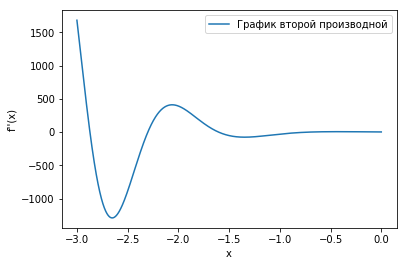

In [23]:
dmp_plot = np.linspace(-3.0, 0.0, 2000)
#dmy_plot =np.apply_along_axis(derivative, 0, dmp_plot) # значения второй произодной на отрезке 
dmy_plot  = np.zeros(2000)
for i in range(len(dmp_plot)):
    dmy_plot[i] = derivative(dmp_plot[i])
plt.plot(dmp_plot, dmy_plot, label = "График второй производной") 
plt.xlabel("x")
plt.ylabel("f''(x)")
plt.legend()

Точно придется искать максимум модуля второй производной численно. 

In [24]:
theor = [] # Массив из теоретических погрешностей
practical = [] # из практических 
plot_i = []
max_m_2 = np.max(np.abs(dmy_plot))
print("Максимальное значение второй производной :", max_m_2)
for i in range(2, 21):
    plot_i.append(i)
    result = rectangle(f_x,a,b, i)

    practical.append(abs(2.02933-result))
    theor.append(max_m_2*(b-a)**3/i/i/24.0) #чтобы использовать i 

Максимальное значение второй производной : 1683.1682454883035


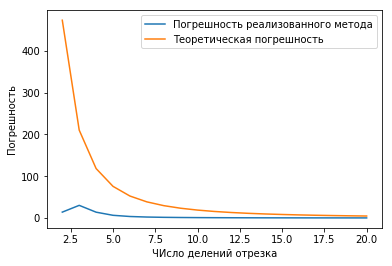

In [25]:
plt.plot(plot_i, practical, label = "Погрешность реализованного метода") 
plt.plot(plot_i, theor, label = "Теоретическая погрешность")
plt.xlabel("ЧИсло делений отрезка")
plt.ylabel("Погрешность")
plt.legend()

По графику теоретической погрешности видно, что чем больше делений (меньше шаг), тем меньше погрешность. 
Погрешность реализованного  метода  метода имеет небольшое возвышение и медленное уменьшение значения. 
Погрешность реализованного метода во всех случаях меньше теоретической. 

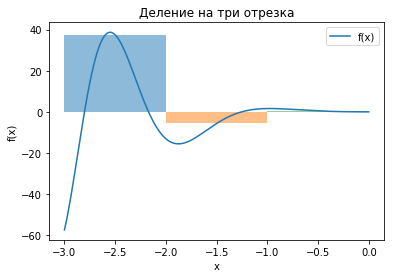

In [26]:
check_x = np.linspace(-3.0, 0.0, 4)

x_plot = np.linspace(-3.0, 0.0, 200)
line = []
for i in range(len(x_plot)):
    line.append(f_x(x_plot[i]))



plt.plot(x_plot, line, label = "f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")

#plt.fill_between([a,b],[p_n(a),p_n(b)], alpha = 0.4)
for i in range(1,len(check_x)):
    value = f_x((check_x[i-1]+check_x[i])/2.0)
    plt.fill_between([check_x[i-1], check_x[i] ], [value, value], alpha = 0.5)

plt.title("Деление на три отрезка")
plt.legend()
plt.show()

Видно, что при делении на три отрезка получается очень грубое приближение.

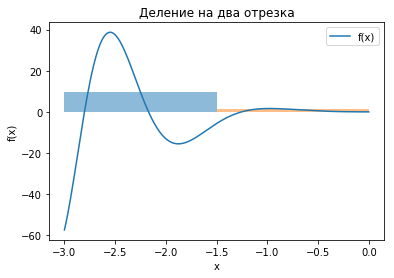

In [27]:
check_x = np.linspace(-3.0, 0.0, 3)

x_plot = np.linspace(-3.0, 0.0, 200)
line = []
for i in range(len(x_plot)):
    line.append(f_x(x_plot[i]))

plt.plot(x_plot, line, label = "f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")

#plt.fill_between([a,b],[p_n(a),p_n(b)], alpha = 0.4)
for i in range(1,len(check_x)):
    value = f_x((check_x[i-1]+check_x[i])/2.0)
    plt.fill_between([check_x[i-1], check_x[i] ], [value, value], alpha = 0.5)

plt.title("Деление на два отрезка")
plt.legend()
plt.show()

# тут второй прямоугольник совсем узкий

Такое деление дало результат получше, чем деление на три отрезка. Но это просто случайность ( и причина возвышения графика полученной погрешности реализованного метода).

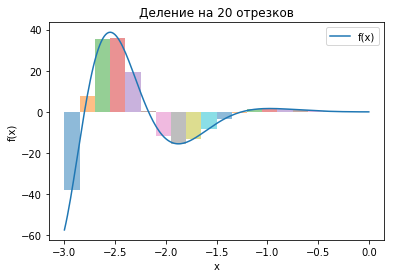

In [28]:
check_x = np.linspace(-3.0, 0.0, 21)

x_plot = np.linspace(-3.0, 0.0, 200)
line = []
for i in range(len(x_plot)):
    line.append(f_x(x_plot[i]))




plt.plot(x_plot, line, label = "f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")

#plt.fill_between([a,b],[p_n(a),p_n(b)], alpha = 0.4)
for i in range(1,len(check_x)):
    value = f_x((check_x[i-1]+check_x[i])/2.0)
    plt.fill_between([check_x[i-1], check_x[i] ], [value, value], alpha = 0.5)

plt.title("Деление на 20 отрезков")
plt.legend()
plt.show()


А так уже неплохо:)